In [1]:
from scipy.spatial import distance
import matplotlib.pyplot as plt
from matplotlib import animation
import random

In [2]:
maxx = 100
no_of_people = 500
radius = 8

class Person(object):
    def __init__(self,x,y,h,ID):
        self.x =  x
        self.y = y
        
        self.li = ['Normal','Infected', 'Recovered', 'Dead']
        self.health = self.li[h]
        self.id =  ID
        self.loc = [self.x,self.y]
        self.neigh = []
        
    def caldist(self,a):
        return distance.euclidean(self.loc,a.loc)
    
    def MySent(self):
        return ("I'm {0}. My health condition is {1} and I'm located at {2}".format(self.id,
                                                                                        self.health,
                                                                                        self.loc))
  
    def loc1(self):
#    def loc(self):
        return self.loc

x_vals = []
for i in range(no_of_people):
    a = random.randint(0,maxx)
    x_vals.append(a)

y_vals = []
for i in range(no_of_people):
    a = random.randint(0,maxx)
    y_vals.append(a)
    
    
# creating people
## Person (x = x_coordinate, y = y_coordinate, h = health[0,1,2,3], ID = some no)
people = []

## Randomly assigns a value to the people

# for i in range(no_of_people * 0.8):
#     people.append(Person(x_vals[i], y_vals[i], random.randint(0,1), i))


## 80 and 20  percentage split for normal and infected

for i in range(480):
    people.append(Person(x_vals[i], y_vals[i], 0, i))

for i in range(20):
    people.append(Person(x_vals[i], y_vals[i], 1, i))
    
    

def plotting():
    
    l_normal_x = []
    l_normal_y = []

    l_infec_x = []
    l_infec_y = []

    l_recov_x = []
    l_recov_y = []

    l_dead_x = []
    l_dead_y = []


    for i in range(no_of_people):
        if people[i].health == 'Normal': # normal
            l_normal_x.append(people[i].x)
            l_normal_y.append(people[i].y)

        elif people[i].health == 'Infected': # infected
            l_infec_x.append(people[i].x)
            l_infec_y.append(people[i].y)

        elif people[i].health == 'Recovered': # recovered 
            l_recov_x.append(people[i].x)
            l_recov_y.append(people[i].y)

        elif people[i].health == 'Dead': # dead 
            l_dead_x.append(people[i].x)
            l_dead_y.append(people[i].y)
            
    n_plot = plt.scatter(l_normal_x,l_normal_y,marker='o', color='green')
    i_plot =  plt.scatter(l_infec_x,l_infec_y,marker='*', color='red')
    r_plot = plt.scatter(l_recov_x,l_recov_y,marker='o', color='blue')
    d_plot = plt.scatter(l_dead_x,l_dead_y,marker='*', color='black', )
    
    print('Normal : ' + str(len(l_normal_x)))
    print('Infected : ' + str(len(l_infec_x)))
#     print('Recovered (blue): ' + str(len(l_recov_x)))
#     print('Dead (black): ' + str(len(l_dead_x)))
    #plt.legend((n_plot,i_plot,r_plot, d_plot), ('Normal', 'Infected', 'Recovered', 'Dead'), loc = 0)
    plt.legend((n_plot,i_plot), ('Normal', 'Infected'), loc = 0)
    

# Calculating distances

# def calneigh():
#     for i in people:
#         for j in people:
#             res = i.caldist(j)

            
# ## complete this -- 

def calc():
    for i in people:
        for j in people:
            res = i.caldist(j)
            #print('dist of ' + str( people[i].id) + ' to ' + str(people[j].id) + ' is ' + str(res))
            if res <= radius:
                i.neigh.append(j.id)

            if i.health == 'Infected' and j.health == 'Normal' and res <= radius :
                j.health = 'Infected'


Normal : 480
Infected : 20


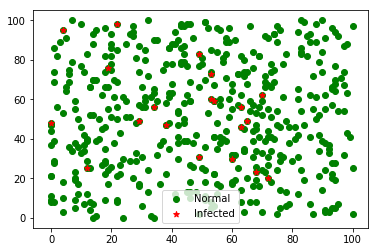

In [8]:
plotting()

Normal : 330
Infected : 170


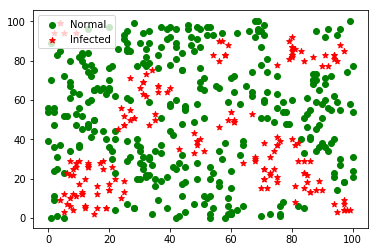

In [4]:
calc()
plotting()

Normal : 51
Infected : 449


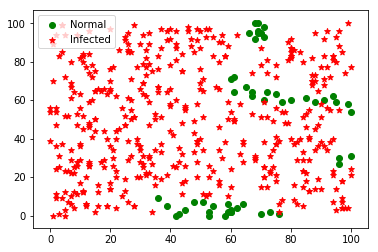

In [5]:
calc()
plotting()

Normal : 0
Infected : 500


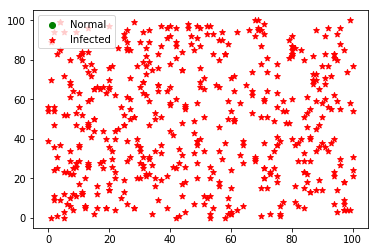

In [6]:
calc()
plotting()

Normal : 328
Infected : 172


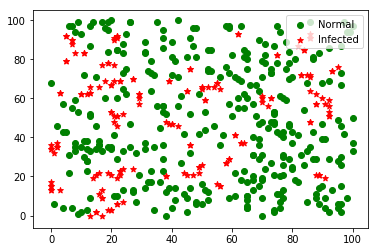

In [229]:
calc()
plotting()

Normal : 328
Infected : 172


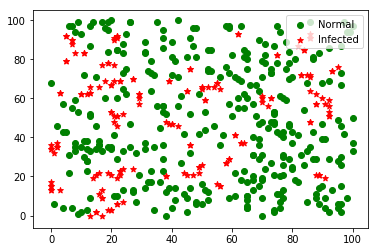

In [231]:
calc()
plotting()

Normal : 20
Infected : 80


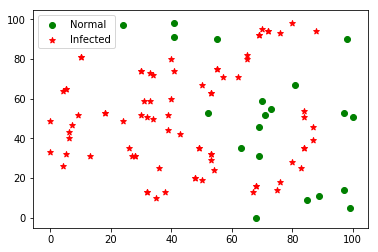

In [205]:
calc()
plotting()

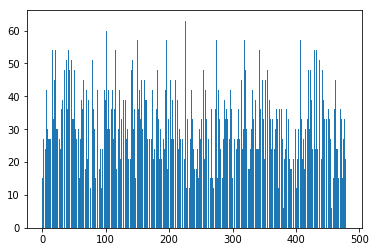

In [247]:
list1 = []
h =[]
for i in range(no_of_people):
    list1.append(people[i].id)
    

for i in people:
    h.append(len(i.neigh))

plt.bar(list1, h);

In [22]:
# Make dense no. of people iwith small rad

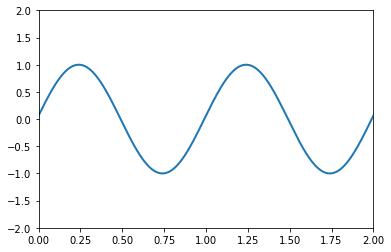

In [9]:
import numpy as np
from matplotlib import pyplot as plt

# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure()
# ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
# line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()